In [1]:
import numpy as np
from scipy.optimize import linprog
import pandas as pd
import matplotlib.pyplot as plt
from itertools import product, permutations
from collections import defaultdict
from scipy.linalg import lu

In [2]:
def solve(eps=1.0, bnd=8, n=3):
    def add(q,dq):
        return tuple(a+b for a,b in zip(q,dq))

    def normalize(q):
        b = max(q)
        return tuple(a-b for a in q)

    def canonical(q,r):
        q2 = list(sorted(q))
        r2 = q2.index(q[r])
        return normalize(q2), r2

    def nbrs(q):
        DQ = product(*[[-2,0]]*n)
        ans = [add(q,dq) for dq in DQ]
        return ans

    def worst_nbr(q,r):
        q2 = tuple(q[i]+2*(i==r) for i in range(n))
        return canonical(q2, r)

    def compute_valid(depth):
        if depth == 0:
            return { tuple([0]*n) }
        curr = compute_valid(depth-1)
        nxt = set.union(*[set(nbrs(q)) for q in curr])
        return nxt

    allqr = []
    qs = []
    valid, idx = {}, 0
    for q in product(*[range(-bnd, 1, 2)]*n):
    #for q in sorted(compute_valid(5)):
        for r in range(n):
            allqr.append((q,r))
            key = canonical(q,r)
            if not key in valid:
                valid[key] = idx
                idx += 1
            if not key[0] in qs:
                qs.append(key[0])
                
    # Objective          
    m = len(valid)
    c = np.zeros(m)
    for q,r in allqr:
        key = canonical(q,r)
        c[valid[key]] += q[r]-max(q)
    print(m, 'variables')
    
    # Probability constraints:
    Aeq = []
    for q in qs:
        row = np.zeros(m)
        for r in range(n):
            i = valid[canonical(q,r)]
            row[i] += 1
        Aeq.append(row)

    Aeq = np.array(Aeq)
    beq = np.ones(Aeq.shape[0])
    
    # All worst-case privacy constraints
    Aub = []
    for key1 in valid:
        row = np.zeros(m)
        key2 = worst_nbr(*key1)
        if key2 in valid:
            i = valid[key1]
            j = valid[key2]
            row[i] = -np.exp(eps)
            row[j] = 1
            Aub.append(row)
    Aub = np.array(Aub)
    bub = np.zeros(Aub.shape[0])
    
    # EM and PF
    def dp(q,eps=1.0):
        s = q - q.max()
        c = np.exp(0.5*eps*s)
        n = q.size
        c = { i+1 : c[i] for i in range(n) }
        f = defaultdict(lambda: 0)
        f[n-1,n-1] = c[n]/n
        for i in range(n-2,0,-1):
            for j in range(n-1,i-1,-1):
                #print(i,j)
                f[i,j] = c[j+1]*(1.0/(i+1) - f[i+1,j+1]) + f[i,j+1]
        return c[1]*(1 - f[1,1])

    pf = []
    em = []
    for q,r in valid:
        q = np.array(q)
        q[r], q[0] = q[0], q[r]
        pf.append(dp(q,eps))
        em.append( (np.exp(eps*q/2) / np.exp(eps*q/2).sum())[0] )
    pf = np.array(pf)
    em = np.array(em)
    
    if eps >= np.log(0.5*(3 + np.sqrt(5))):
        opt = pf
    else:
        ans = linprog(-c, Aub, bub, Aeq, beq, method='revised simplex', x0=pf)
        print(ans.message)
        opt = ans.x
        
    return opt @ c, pf @ c, em @ c

In [3]:
lookup = {}
epss = np.logspace(-2, 1, 250)
for n in [2,3,4,5,6]:
    for k in [4]: #1,2,3,4,5,6,7]:
        ans = np.array([solve(e, n=n, bnd=2*k) for e in epss]).T
        lookup[(n,k)] = ans
        
for n in [4]:
    for k in [2,6,8]: #[1,2,3,4,5,6,7,8]:
        ans = np.array([solve(e, n=n, bnd=2*k) for e in epss]).T
        lookup[(n,k)] = ans

9 variables
Optimization terminated successfully.
9 variables
Optimization terminated successfully.
9 variables
Optimization terminated successfully.
9 variables
Optimization terminated successfully.
9 variables
Optimization terminated successfully.
9 variables
Optimization terminated successfully.
9 variables
Optimization terminated successfully.
9 variables
Optimization terminated successfully.
9 variables
Optimization terminated successfully.
9 variables
Optimization terminated successfully.
9 variables
Optimization terminated successfully.
9 variables
Optimization terminated successfully.
9 variables
Optimization terminated successfully.
9 variables
Optimization terminated successfully.
9 variables
Optimization terminated successfully.
9 variables
Optimization terminated successfully.
9 variables
Optimization terminated successfully.
9 variables
Optimization terminated successfully.
9 variables
Optimization terminated successfully.
9 variables
Optimization terminated successfully.


Optimization terminated successfully.
35 variables
Optimization terminated successfully.
35 variables
Optimization terminated successfully.
35 variables
Optimization terminated successfully.
35 variables
Optimization terminated successfully.
35 variables
Optimization terminated successfully.
35 variables
Optimization terminated successfully.
35 variables
Optimization terminated successfully.
35 variables
Optimization terminated successfully.
35 variables
Optimization terminated successfully.
35 variables
Optimization terminated successfully.
35 variables
Optimization terminated successfully.
35 variables
Optimization terminated successfully.
35 variables
Optimization terminated successfully.
35 variables
Optimization terminated successfully.
35 variables
Optimization terminated successfully.
35 variables
Optimization terminated successfully.
35 variables
Optimization terminated successfully.
35 variables
Optimization terminated successfully.
35 variables
Optimization terminated success

35 variables
35 variables
35 variables
35 variables
35 variables
35 variables
35 variables
35 variables
35 variables
35 variables
35 variables
35 variables
35 variables
35 variables
35 variables
35 variables
35 variables
35 variables
35 variables
35 variables
35 variables
35 variables
35 variables
35 variables
35 variables
35 variables
35 variables
35 variables
35 variables
35 variables
95 variables
Optimization terminated successfully.
95 variables
Optimization terminated successfully.
95 variables
Optimization terminated successfully.
95 variables
Optimization terminated successfully.
95 variables
Optimization terminated successfully.
95 variables
Optimization terminated successfully.
95 variables
Optimization terminated successfully.
95 variables
Optimization terminated successfully.
95 variables
Optimization terminated successfully.
95 variables
Optimization terminated successfully.
95 variables
Optimization terminated successfully.
95 variables
Optimization terminated successfully

Optimization terminated successfully.
95 variables
Optimization terminated successfully.
95 variables
Optimization terminated successfully.
95 variables
Optimization terminated successfully.
95 variables
Optimization terminated successfully.
95 variables
Optimization terminated successfully.
95 variables
Optimization terminated successfully.
95 variables
Optimization terminated successfully.
95 variables
Optimization terminated successfully.
95 variables
Optimization terminated successfully.
95 variables
Optimization terminated successfully.
95 variables
95 variables
95 variables
95 variables
95 variables
95 variables
95 variables
95 variables
95 variables
95 variables
95 variables
95 variables
95 variables
95 variables
95 variables
95 variables
95 variables
95 variables
95 variables
95 variables
95 variables
95 variables
95 variables
95 variables
95 variables
95 variables
95 variables
95 variables
95 variables
95 variables
95 variables
95 variables
95 variables
95 variables
95 variabl

Optimization terminated successfully.
210 variables
Optimization terminated successfully.
210 variables
Optimization terminated successfully.
210 variables
Optimization terminated successfully.
210 variables
Optimization terminated successfully.
210 variables
Optimization terminated successfully.
210 variables
Optimization terminated successfully.
210 variables
Optimization terminated successfully.
210 variables
Optimization terminated successfully.
210 variables
Optimization terminated successfully.
210 variables
Optimization terminated successfully.
210 variables
Optimization terminated successfully.
210 variables
Optimization terminated successfully.
210 variables
Optimization terminated successfully.
210 variables
Optimization terminated successfully.
210 variables
Optimization terminated successfully.
210 variables
Optimization terminated successfully.
210 variables
Optimization terminated successfully.
210 variables
Optimization terminated successfully.
210 variables
Optimization

406 variables
Optimization terminated successfully.
406 variables
Optimization terminated successfully.
406 variables
Optimization terminated successfully.
406 variables
Optimization terminated successfully.
406 variables
Optimization terminated successfully.
406 variables
Optimization terminated successfully.
406 variables
Optimization terminated successfully.
406 variables
Optimization terminated successfully.
406 variables
Optimization terminated successfully.
406 variables
Optimization terminated successfully.
406 variables
Optimization terminated successfully.
406 variables
Optimization terminated successfully.
406 variables
Optimization terminated successfully.
406 variables
Optimization terminated successfully.
406 variables
Optimization terminated successfully.
406 variables
Optimization terminated successfully.
406 variables
Optimization terminated successfully.
406 variables
Optimization terminated successfully.
406 variables
Optimization terminated successfully.
406 variable

Optimization terminated successfully.
22 variables
Optimization terminated successfully.
22 variables
Optimization terminated successfully.
22 variables
Optimization terminated successfully.
22 variables
Optimization terminated successfully.
22 variables
Optimization terminated successfully.
22 variables
Optimization terminated successfully.
22 variables
Optimization terminated successfully.
22 variables
Optimization terminated successfully.
22 variables
Optimization terminated successfully.
22 variables
Optimization terminated successfully.
22 variables
Optimization terminated successfully.
22 variables
Optimization terminated successfully.
22 variables
Optimization terminated successfully.
22 variables
Optimization terminated successfully.
22 variables
Optimization terminated successfully.
22 variables
Optimization terminated successfully.
22 variables
Optimization terminated successfully.
22 variables
Optimization terminated successfully.
22 variables
Optimization terminated success

Optimization terminated successfully.
252 variables
Optimization terminated successfully.
252 variables
Optimization terminated successfully.
252 variables
Optimization terminated successfully.
252 variables
Optimization terminated successfully.
252 variables
Optimization terminated successfully.
252 variables
Optimization terminated successfully.
252 variables
Optimization terminated successfully.
252 variables
Optimization terminated successfully.
252 variables
Optimization terminated successfully.
252 variables
Optimization terminated successfully.
252 variables
Optimization terminated successfully.
252 variables
Optimization terminated successfully.
252 variables
Optimization terminated successfully.
252 variables
Optimization terminated successfully.
252 variables
Optimization terminated successfully.
252 variables
Optimization terminated successfully.
252 variables
Optimization terminated successfully.
252 variables
Optimization terminated successfully.
252 variables
Optimization

525 variables
Optimization terminated successfully.
525 variables
Optimization terminated successfully.
525 variables
Optimization terminated successfully.
525 variables
Optimization terminated successfully.
525 variables
Optimization terminated successfully.
525 variables
Optimization terminated successfully.
525 variables
Optimization terminated successfully.
525 variables
Optimization terminated successfully.
525 variables
Optimization terminated successfully.
525 variables
Optimization terminated successfully.
525 variables
Optimization terminated successfully.
525 variables
Optimization terminated successfully.
525 variables
Optimization terminated successfully.
525 variables
Optimization terminated successfully.
525 variables
Optimization terminated successfully.
525 variables
Optimization terminated successfully.
525 variables
Optimization terminated successfully.
525 variables
Optimization terminated successfully.
525 variables
Optimization terminated successfully.
525 variable

525 variables
525 variables
525 variables
525 variables
525 variables
525 variables
525 variables
525 variables
525 variables
525 variables
525 variables
525 variables
525 variables
525 variables
525 variables
525 variables
525 variables
525 variables
525 variables
525 variables
525 variables
525 variables
525 variables
525 variables
525 variables
525 variables
525 variables
525 variables
525 variables
525 variables
525 variables
525 variables
525 variables
525 variables
525 variables
525 variables
525 variables
525 variables
525 variables
525 variables
525 variables
525 variables
525 variables
525 variables
525 variables
525 variables
525 variables
525 variables
525 variables
525 variables
525 variables
525 variables


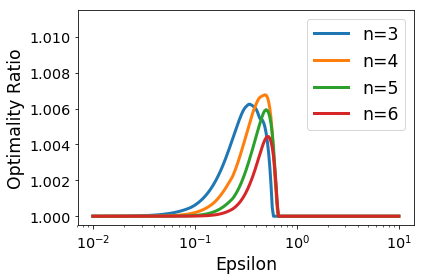

In [5]:
for n in [3,4,5,6]:
    for k in [4]: #1,2,3,4,5,6,7]:
        ans = lookup[(n,k)]
        rat1 = ans[1] / ans[0]
        rat2 = ans[2] / ans[0]
        plt.plot(epss, rat1, linewidth=3, label='n=%d'%n)
#plt.plot(epss, rat2)
plt.ylim(0.9995,1.0115)
plt.xscale('log')
plt.xticks(fontsize='x-large')
plt.yticks(fontsize='x-large')
plt.xlabel('Epsilon', fontsize='xx-large')
plt.ylabel('Optimality Ratio', fontsize='xx-large')
plt.legend(fontsize='xx-large')
plt.tight_layout()
plt.savefig('pf_opt.pdf')

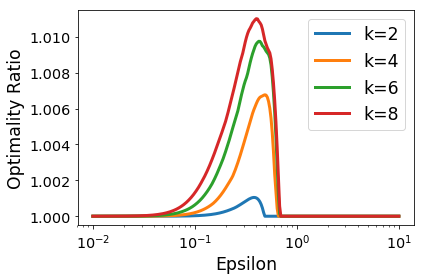

In [6]:
for n in [4]:
    for k in [2,4,6,8]: #[1,2,3,4,5,6,7,8]:
        ans = lookup[(n,k)]
        rat1 = ans[1] / ans[0]
        rat2 = ans[2] / ans[0]
        plt.plot(epss, rat1, linewidth=3, label='k=%d'%k)
#plt.plot(epss, rat2)
plt.ylim(0.9995,1.0115)
plt.xscale('log')
plt.xticks(fontsize='x-large')
plt.yticks(fontsize='x-large')
plt.xlabel('Epsilon', fontsize='xx-large')
plt.ylabel('Optimality Ratio', fontsize='xx-large')
plt.legend(fontsize='xx-large')
plt.tight_layout()
plt.savefig('pf_opt2.pdf')

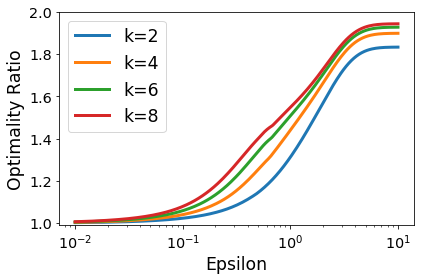

In [7]:
for n in [4]:
    for k in [2,4,6,8]:
        ans = lookup[(n,k)]
        rat1 = ans[1] / ans[0]
        rat2 = ans[2] / ans[0]
        plt.plot(epss, rat2, linewidth=3, label='k=%d'%k)
#plt.plot(epss, rat2)
plt.xscale('log')
plt.ylim(0.99,2.0)
plt.xticks(fontsize='x-large')
plt.yticks(fontsize='x-large')
plt.xlabel('Epsilon', fontsize='xx-large')
plt.ylabel('Optimality Ratio', fontsize='xx-large')
plt.legend(fontsize='xx-large')
plt.tight_layout()
plt.savefig('em_opt3.pdf')